In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import imageio

In [348]:
df = pd.read_csv('./data/Shakespeare_data.csv', sep=',')
df['Player'].replace(np.nan, 'Other',inplace = True)
df = df[df['Play']=='Julius Caesar']
df.shape

(2771, 6)

In [111]:
df.groupby(['Player'])['Player','PlayerLine'].count().sort_values(by='Player',ascending=False).head(10)

,Player,PlayerLine
Player,,
BRUTUS,789,789
CASSIUS,551,551
ANTONY,342,342
CAESAR,144,144
CASCA,137,137
PORTIA,96,96
OCTAVIUS,54,54
DECIUS BRUTUS,44,44
MESSALA,39,39


In [349]:
df = df[df['Player']=='BRUTUS']
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
46360,46361,Julius Caesar,16.0,1.2.23,BRUTUS,A soothsayer bids you beware the ides of March.
46368,46369,Julius Caesar,23.0,1.2.30,BRUTUS,Not I.
46370,46371,Julius Caesar,25.0,1.2.32,BRUTUS,I am not gamesome: I do lack some part
46371,46372,Julius Caesar,25.0,1.2.33,BRUTUS,Of that quick spirit that is in Antony.
46372,46373,Julius Caesar,25.0,1.2.34,BRUTUS,"Let me not hinder, Cassius, your desires,"


#### Wordcloud of all Brutus' words

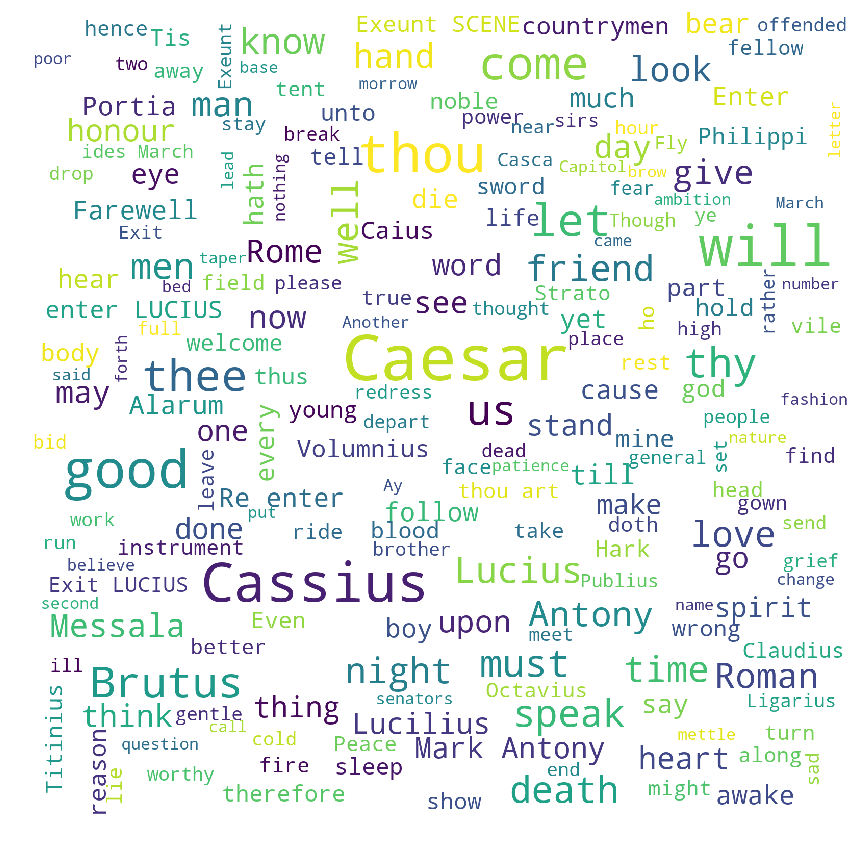

In [353]:
wordcld = pd.Series(df['PlayerLine'].tolist()).astype(str)

from wordcloud import WordCloud,STOPWORDS
import matplotlib as mpl
mpl.rcParams['savefig.dpi']=300 

stopwords = set(STOPWORDS)

cloud = WordCloud(margin=1,max_font_size=125,background_color='white',
                          stopwords=stopwords,width=1600, height=1600).generate(' '.join(wordcld.astype(str)))

plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('Brutus\' wordcloud.png', dpi=300)
#plt.show()

#### Assigning Sentiment

In [114]:
from textblob import TextBlob

def get_line_sentiment(line):
        a = TextBlob(line).sentiment.polarity
        if a < 0: return 'negative'
        if a > 0: return 'positive'
        if a == 0: return 'neutral'

In [115]:
df['Sentiment'] = df['PlayerLine'].apply(lambda x: get_line_sentiment(x))
df.tail()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Sentiment
48991,48992,Julius Caesar,25.0,NaN,BRUTUS,Runs on his sword,neutral
48992,48993,Julius Caesar,25.0,5.5.56,BRUTUS,"Caesar, now be still:",neutral
48993,48994,Julius Caesar,25.0,5.5.57,BRUTUS,I kill'd not thee with half so good a will.,positive
48994,48995,Julius Caesar,25.0,NaN,BRUTUS,Dies,neutral
48995,48996,Julius Caesar,25.0,NaN,BRUTUS,"Alarum. Retreat. Enter OCTAVIUS, ANTONY, MESSA...",neutral


#### Forward filling the Act Scene

In [116]:
df['ActSceneLine'] = df['ActSceneLine'].fillna(method='ffill')

#### Splitting Act and Scene

In [117]:
temp = df['ActSceneLine'].str.split('.', expand=True).astype(int)
temp.columns = ['Act', 'Scene','Line']
df = pd.concat([df, temp], axis=1)
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Sentiment,Act,Scene,Line
46360,46361,Julius Caesar,16.0,1.2.23,BRUTUS,A soothsayer bids you beware the ides of March.,neutral,1,2,23
46368,46369,Julius Caesar,23.0,1.2.30,BRUTUS,Not I.,neutral,1,2,30
46370,46371,Julius Caesar,25.0,1.2.32,BRUTUS,I am not gamesome: I do lack some part,neutral,1,2,32
46371,46372,Julius Caesar,25.0,1.2.33,BRUTUS,Of that quick spirit that is in Antony.,positive,1,2,33
46372,46373,Julius Caesar,25.0,1.2.34,BRUTUS,"Let me not hinder, Cassius, your desires,",neutral,1,2,34


#### Cumulative sum of sentiments

In [118]:
df['Pflag'] = np.where(df['Sentiment']=='positive',1,0)
df['Nflag'] = np.where(df['Sentiment']=='negative',1,0)
df['Zflag'] = np.where(df['Sentiment']=='neutral',1,0)
df['Pflag'] = df['Pflag'].cumsum() 
df['Nflag'] = df['Nflag'].cumsum()
df['Zflag'] = df['Zflag'].cumsum()
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Sentiment,Act,Scene,Line,Pflag,Nflag,Zflag
46360,46361,Julius Caesar,16.0,1.2.23,BRUTUS,A soothsayer bids you beware the ides of March.,neutral,1,2,23,0,0,1
46368,46369,Julius Caesar,23.0,1.2.30,BRUTUS,Not I.,neutral,1,2,30,0,0,2
46370,46371,Julius Caesar,25.0,1.2.32,BRUTUS,I am not gamesome: I do lack some part,neutral,1,2,32,0,0,3
46371,46372,Julius Caesar,25.0,1.2.33,BRUTUS,Of that quick spirit that is in Antony.,positive,1,2,33,1,0,3
46372,46373,Julius Caesar,25.0,1.2.34,BRUTUS,"Let me not hinder, Cassius, your desires,",neutral,1,2,34,1,0,4


#### Seaborn settings

In [332]:
sns.set_style("white")
font_h1 = {'family': 'Segoe UI',
           'color': 'black',
           'weight': 'semibold',
           'size': 14,
           'horizontalalignment': 'center'}
font_h2 = {'family': 'Segoe UI',
            'color': 'black',
            'weight': 'regular',
            'size': 10,
            'horizontalalignment': 'left'}
font_title = {'family': 'Segoe UI',
              'color': 'black',
              'weight': 'regular',
              'size': 12}

#### A function to get cumulative sentiment given a play, character, act and scene

In [288]:
def chartdata(play, player,act, scene):
    
    df = pd.read_csv('./data/Shakespeare_data.csv', sep=',')
    df['Player'].replace(np.nan, 'Other',inplace = True)
    df = df[df['Play']==play]
    df = df[df['Player']==player]

    df['Sentiment'] = df['PlayerLine'].apply(lambda x: get_line_sentiment(x))
    
    df['ActSceneLine'] = df['ActSceneLine'].fillna(method='ffill')
    temp = df['ActSceneLine'].str.split('.', expand=True).astype(int)
    temp.columns = ['Act', 'Scene','Line']
    temp['Scene'] = temp['Act']*10+temp['Scene']
    df = pd.concat([df, temp], axis=1)

    df['Pflag'] = np.where(df['Sentiment']=='positive',1,0)
    df['Nflag'] = np.where(df['Sentiment']=='negative',1,0)
    df['Zflag'] = np.where(df['Sentiment']=='neutral',1,0)
    
    df['Pflag'] = df['Pflag'].cumsum() 
    df['Nflag'] = df['Nflag'].cumsum()
    df['Zflag'] = df['Zflag'].cumsum()

    p1 = df[(df['Act']<=act) & (df['Scene']<=act*10+scene)]['Pflag']
    n1 = df[(df['Act']<=act) & (df['Scene']<=act*10+scene)]['Nflag']
    z1 = df[(df['Act']<=act) & (df['Scene']<=act*10+scene)]['Zflag']
    
    p1,n1,z1 = p1.tolist(),n1.tolist(),z1.tolist()
    if len(p1)==0:p1=0 
    else:p1=p1[-1]
    if len(n1)==0:n1=0 
    else:n1=n1[-1]
    if len(z1)==0:z1=0 
    else:z1=z1[-1]
    
    return p1,n1,z1 

In [227]:
play = 'Julius Caesar'
players = ['BRUTUS','CASSIUS','ANTONY']
acts = [1,2,3,4,5]
scenes = [3,4,3,3,5]

#### Building lists of values for bar plots

In [289]:
pos1=[]
neg1=[]
zer1=[]
pos2=[]
neg2=[]
zer2=[]

for act in acts:
    for scene in range(scenes[act-1]):
        
        #f, ax = plt.subplots(figsize=(7, 3))

        p1,n1,z1 = chartdata(play, 'CASSIUS',act, scene+1)
        p2,n2,z2 = chartdata(play, 'BRUTUS',act, scene+1)
        
        pos1.append(p1)
        neg1.append(n1)
        zer1.append(z1)
        pos2.append(p2)
        neg2.append(n2)
        zer2.append(z2)      

In [294]:
pos1

[0, 40, 57, 68, 68, 68, 68, 75, 75, 75, 75, 77, 98, 110, 110, 118, 118, 118]

#### Function for plotting and saving figures

In [286]:
def chartplot(cn,cp,cz,bn,bp,bz,j,i,counter):
    f, ax = plt.subplots(figsize=(7, 3))
    sns.set_color_codes("pastel")
    sns.barplot(y=['Negative','Positive','Neutral'], x=[cn+bn,cp+bp,cz+bz],color='b',label='Cassius')

    sns.set_color_codes("muted")
    sns.barplot(y=['Negative','Positive','Neutral'], x=[bn,bp,bz],color="b",label='Brutus')

    plt.xlim(0, 920)
    plt.title('Act: '+str(ac[j])+' Scene: '+str(sc[j])+' Line: '+str(counter*4),fontdict = font_title)
    ax.legend(ncol=2, loc="lower right", frameon=True)
    sns.despine(bottom=True, left=True)
    ax.set_xticks([])
    plt.tight_layout()
    plt.savefig('./output/'+str(ac[j])+'_'+str(sc[j])+'_'+str(i)+'.png', dpi=300)
    plt.close("all")

#### Generating cordinates: interpolation for smooth frames

In [329]:
ac=[]
sc=[]
for act in acts:
    for scene in range(scenes[act-1]):
        ac.append(act)
        sc.append(scene+1)

counter = 0
for j in range(len(pos1)):
    if j == len(pos1)-1:break
    
    m = max(pos1[j+1]-pos1[j],
            neg1[j+1]-neg1[j],
            zer1[j+1]-zer1[j],
            pos2[j+1]-pos2[j],
            neg2[j+1]-neg2[j],
            zer2[j+1]-zer2[j])

    for i in range(m):
        counter+=1

        cp = min(pos1[j]+i,pos1[j+1])
        cn = min(neg1[j]+i,neg1[j+1])
        cz = min(zer1[j]+i,zer1[j+1])
        bp = min(pos2[j]+i,pos2[j+1])
        bn = min(neg2[j]+i,neg2[j+1])
        bz = min(zer2[j]+i,zer2[j+1])
        
        chartplot(cn,cp,cz,bn,bp,bz,j,i,counter)

#### Plotting the last figure

In [296]:
chartplot(neg1[17],pos1[17],zer1[17],neg2[17],pos2[17],zer2[17],17,0,693)

#### Extra frames

In [320]:
def eframes(text,i):
    f, ax = plt.subplots(figsize=(7, 3))

    p1,n1,z1 = chartdata(play, 'CASSIUS',5, 5)
    p2,n2,z2 = chartdata(play, 'BRUTUS',5, 5)

    sns.set_color_codes("muted")
    sns.barplot(y=['Negative','Positive','Neutral'], x=[n2,p2,z2],color="w",label='Brutus')

    plt.xlim(0, 914)

    plt.text(457, 1,text,fontdict=font_h1)
    plt.text(0, 2.5,'© Shubhankar Tiwari: https://github.com/shubhstiws/shakespeare\
    \nData Source: https://www.kaggle.com/kingburrito666/shakespeare-plays',fontdict=font_h2)

    sns.despine(bottom=True, left=True)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig('./output/'+str(i)+'.png', dpi=300)
    plt.close("all")

In [328]:
eframes('Soothsayer: “Beware the ides of March!”','01')
eframes('Caesar: “Et tu, Brute?” \nA Latin sentence meaning “Even you, Brutus?”','02')
eframes('Antony: “And Brutus is an honourable man”','03')
eframes('Lets analyse the “honor” by data...','04')
eframes('A visualization of change in sentiment of\
\nBrutus and Cassius as the play Julius Caesar progresses','05')

#### Reading charts form disk and saving into RGB array

In [337]:
png_files = [f for f in os.listdir('./output') if f.endswith('.png')]

import re
numbers = re.compile(r'(\d+)')

def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

png_files = sorted(png_files,key=numericalSort)

png_files.remove('01.png')
png_files.remove('02.png')
png_files.remove('03.png')
png_files.remove('04.png')
png_files.remove('05.png')

In [344]:
charts = []
pth = os.path.join(str(os.getcwd())+'/output')
# Append the title chart - https://stackoverflow.com/a/35943809
for i in range(50):
    charts.append(imageio.imread(pth+'/01.png'))

for i in range(50):
    charts.append(imageio.imread(pth+'/02.png'))
    
for i in range(50):
    charts.append(imageio.imread(pth+'/03.png'))
    
for i in range(50):
    charts.append(imageio.imread(pth+'/04.png'))
    
for i in range(50):
    charts.append(imageio.imread(pth+'/05.png'))


# Append all the charts (except the title slides)
for f in png_files:
    charts.append(imageio.imread(pth+'/'+f))

# Append the last chart a few extra times
for i in range(25):
    charts.append(imageio.imread(pth+'/'+f))

In [342]:
# Save gif
imageio.mimsave('shakespeare.gif', charts, format='GIF', duration=0.01)

In [351]:
#save mp4
writer = imageio.get_writer('shakespeare.mp4', fps=20)


for chart in charts:
    writer.append_data(chart)
writer.close()